**INITIALIZATION:**

In [2]:
#@ GETTING LIBRARIES AND DEPENDENCIES: UNCOMMENT BELOW: 
# !python /content/simplepreprocessor.py
# !unzip /content/drive/MyDrive/Data/animals.zip

In [13]:
#@ DOWNLOADING NECESSARY LIBRARIES AND DEPENDENCIES: 
import os
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import img_to_array

from simplepreprocessor import SimplePreprocessor
from simplepreprocessor import SimpleDatasetLoader

**SHALLOW NEURAL NETWORK:**

In [6]:
#@ DEFINING IMAGE TO ARRAY PREPROCESSOR:
class ImageToArrayPreprocessor:                             # Defining Image To Preprocessor Class. 
    def __init__(self, dataFormat=None):                    # Initializing Constructor Function. 
        self.dataFormat = dataFormat                        # Initialization. 
    
    def preprocess(self, image):                            # Initializing Preprocess Method. 
        return img_to_array(image,
                            data_format=self.dataFormat)    # Converting Image2Array. 

In [5]:
#@ DEFINING SHALLOWNET ARCHITECTURE:
class ShallowNet:                                           # Defining Shallow Network. 
    @staticmethod
    def build(width, height, depth, classes):               # Initializing Build Method. 
        model = Sequential()                                # Initializing Sequential Model. 
        inputShape = (height, width, depth)                 # Initializing Input Shape.
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)             # Initializing Input Shape Format. 
        model.add(Conv2D(32, (3, 3), padding="same", 
                         input_shape = inputShape))         # Initializing Convolutional Layer. 
        model.add(Flatten())                                # Converting into 1D List. 
        model.add(Dense(classes))                           # Adding Dense Output Layer. 
        model.add(Activation("softmax"))                    # Initializing Softmax Activation Function. 
        return model

**SHALLOWNET ON ANIMALS:**

In [7]:
#@ GETTING THE DATASET: 
sp = SimplePreprocessor(32, 32)                             # Resizing Images to Fixed Size. 
iap = ImageToArrayPreprocessor()                            # Initializing Channel Ordering. 
imagePaths = list(paths.list_images('/content/animals'))    # Initializing Image Dataset.
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])          # Initializing Dataset Loader. 
(data, labels) = sdl.load(imagePaths, verbose=500)          # Initializing Dataset. 
data = data.astype("float") / 255.0                         # Normalizing Images. 

#@ PREPARING THE DATASET:
(trainX, testX, trainY, testY) = train_test_split(
    data, labels, test_size=0.25, random_state=42)          # Partitioning Training Data and Test Data. 
trainY = LabelBinarizer().fit_transform(trainY)             # Converting Labels into Vectors. 
testY = LabelBinarizer().fit_transform(testY)               # Converting Labels into Vectors. 

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [11]:
#@ INITIALIZING OPTIMIZER AND MODEL: 
opt = SGD(0.005)                                                  # Initializing SGD Optimizer. 
model = ShallowNet.build(width=32,height=32,depth=3, classes=3)   # Initializing Shallow Neural Network. 
model.compile(loss="categorical_crossentropy",optimizer=opt,
              metrics=["accuracy"])                               # Compiling ShallowNet Model. 
H = model.fit(trainX,trainY, validation_data=(testX,testY), 
              batch_size=32, epochs=100, verbose=1)               # Training ShallowNet Model. 

Epoch 1/100
71/71 [==============================] - 1s 9ms/step - loss: 1.0113 - accuracy: 0.4907 - val_loss: 0.9359 - val_accuracy: 0.5333
Epoch 2/100
71/71 [==============================] - 1s 7ms/step - loss: 0.9171 - accuracy: 0.5329 - val_loss: 0.9777 - val_accuracy: 0.4813
Epoch 3/100
71/71 [==============================] - 0s 6ms/step - loss: 0.8620 - accuracy: 0.5702 - val_loss: 0.8681 - val_accuracy: 0.5653
Epoch 4/100
71/71 [==============================] - 0s 6ms/step - loss: 0.8535 - accuracy: 0.5684 - val_loss: 0.8556 - val_accuracy: 0.5720
Epoch 5/100
71/71 [==============================] - 0s 6ms/step - loss: 0.8238 - accuracy: 0.5973 - val_loss: 0.9262 - val_accuracy: 0.5200
Epoch 6/100
71/71 [==============================] - 1s 7ms/step - loss: 0.8021 - accuracy: 0.6147 - val_loss: 0.8150 - val_accuracy: 0.6013
Epoch 7/100
71/71 [==============================] - 0s 6ms/step - loss: 0.7956 - accuracy: 0.6129 - val_loss: 0.8281 - val_accuracy: 0.5987
Epoch 8/100
7

**MODEL EVALUATION:**

In [12]:
#@ INITIALIZING MODEL EVALUATION:
predictions = model.predict(testX, batch_size=32)                   # Getting Model Predictions. 
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), 
                            target_names=["cat", "dog", "panda"]))  # Inspecting Classification Report. 

              precision    recall  f1-score   support

         cat       0.51      0.46      0.48       239
         dog       0.52      0.45      0.48       262
       panda       0.64      0.78      0.71       249

    accuracy                           0.57       750
   macro avg       0.56      0.57      0.56       750
weighted avg       0.56      0.57      0.56       750



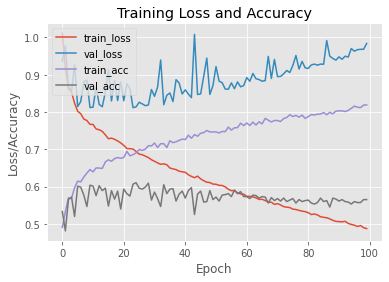

In [15]:
#@ INSPECTING TRAINING LOSS AND ACCURACY:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show();